In [2]:
import os
import copy

# datetime
from datetime import datetime, timedelta
import time

# linear algebra
import numpy as np 
import scipy

# data processing
import pandas as pd 
from collections import defaultdict

# data visualization
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.set()

In [3]:
nyc_data = pd.read_csv(r"C:\Users\Rohan\Desktop\Smart Grids\nyc_forecast.csv")

In [4]:
nyc_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-04-18,5587.741454,3041.446768,5137.103678,5587.741454,5587.741454,0.0,0.0,0.0,0.0,...,-0.034014,-0.034014,-0.034014,-0.142204,-0.142204,-0.142204,0.0,0.0,0.0,4107.153179
1,2022-04-19,5587.757219,3428.578888,5599.382260,5587.757219,5587.757219,0.0,0.0,0.0,0.0,...,0.040081,0.040081,0.040081,-0.143007,-0.143007,-0.143007,0.0,0.0,0.0,4516.709298
2,2022-04-20,5587.772984,3316.696811,5525.416110,5587.772984,5587.772984,0.0,0.0,0.0,0.0,...,0.035449,0.035449,0.035449,-0.143794,-0.143794,-0.143794,0.0,0.0,0.0,4486.438373
3,2022-04-21,5587.788749,3384.267071,5565.399870,5587.788749,5587.788749,0.0,0.0,0.0,0.0,...,0.040248,0.040248,0.040248,-0.144565,-0.144565,-0.144565,0.0,0.0,0.0,4508.961396
4,2022-04-22,5587.804514,3395.139691,5623.255478,5587.804514,5587.804514,0.0,0.0,0.0,0.0,...,0.032548,0.032548,0.032548,-0.145313,-0.145313,-0.145313,0.0,0.0,0.0,4461.767864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,2032-04-10,5645.205034,-69118.576290,86277.055670,-89991.308367,112600.119848,0.0,0.0,0.0,0.0,...,-0.009598,-0.009598,-0.009598,-0.135428,-0.135428,-0.135428,0.0,0.0,0.0,4325.481448
3646,2032-04-11,5645.220799,-60915.145349,74922.089275,-90043.705518,112647.265945,0.0,0.0,0.0,0.0,...,-0.104714,-0.104714,-0.104714,-0.136458,-0.136458,-0.136458,0.0,0.0,0.0,3782.728677
3647,2032-04-12,5645.236564,-67035.190030,83764.798117,-90096.102669,112694.412042,0.0,0.0,0.0,0.0,...,-0.034014,-0.034014,-0.034014,-0.137435,-0.137435,-0.137435,0.0,0.0,0.0,4176.338240
3648,2032-04-13,5645.252329,-73438.486541,92335.102334,-90148.499820,112741.558139,0.0,0.0,0.0,0.0,...,0.040081,0.040081,0.040081,-0.138367,-0.138367,-0.138367,0.0,0.0,0.0,4589.374252


<AxesSubplot:xlabel='ds', ylabel='yhat'>

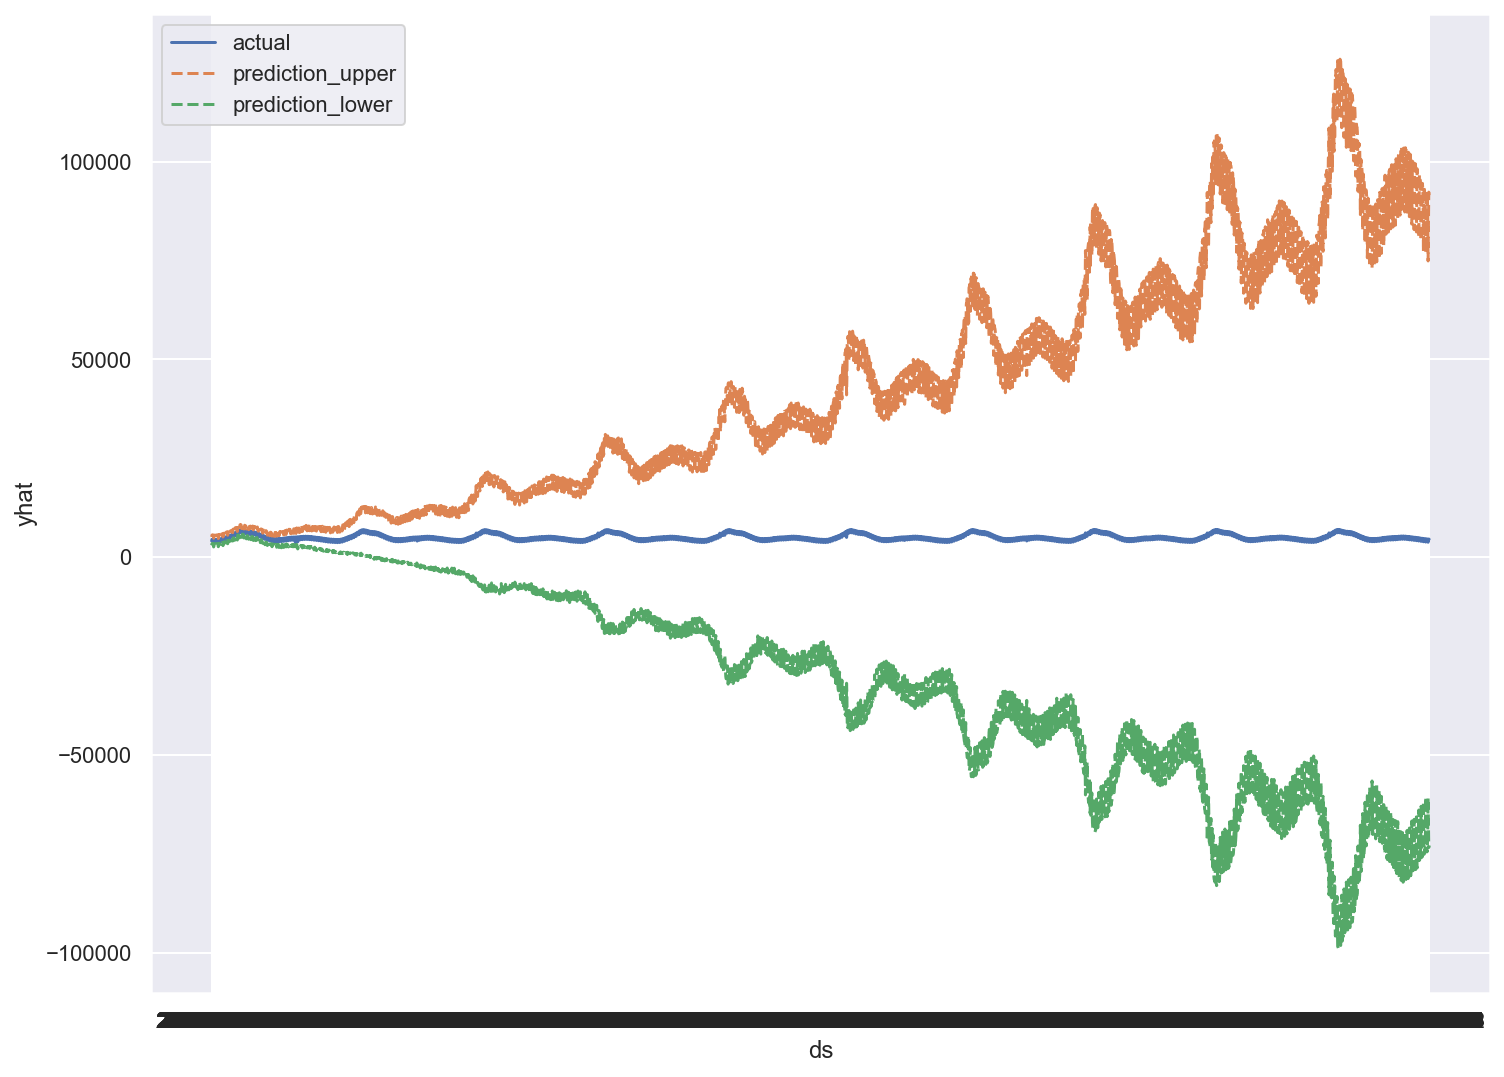

In [7]:
# Columns ds, y, yhat, yhat_upper, yhat_lower

plot_df = nyc_data[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
# plot_df.melt(id_vars=['ds'])
plt.figure(figsize=(12,9))
sns.lineplot(data=plot_df, x='ds', y='yhat', label='actual')
sns.lineplot(data=plot_df, x='ds', y='yhat_upper', linestyle='--', label='prediction_upper')
sns.lineplot(data=plot_df, x='ds', y='yhat_lower', linestyle='--', label='prediction_lower')